<a href="https://colab.research.google.com/github/tamnhu2913/Bristish-Airways-Data-Science/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sns.set(color_codes=True, context="notebook", style='whitegrid', palette="tab20")
cmap = sns.color_palette("tab20")

import warnings
warnings.filterwarnings("ignore")

# Loading data

In [ ]:
df = pd.read_csv('/content/customer_booking.csv', encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Explore Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [ ]:
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [ ]:
df.shape

(50000, 14)

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


## Sales Channel

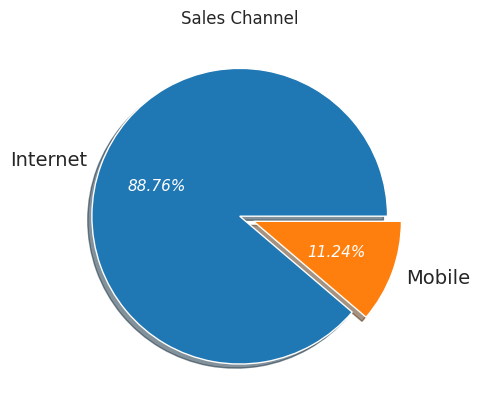

In [ ]:
df_plot = df['sales_channel'].value_counts().reset_index()
df_plot['percent'] = df_plot['count']/ df_plot['count'].sum() * 100

patches, texts, autotexts = plt.pie(df_plot['percent'], labels = df_plot['sales_channel'], autopct='%.2f%%',
                                    textprops = {'fontsize': 14}, explode = (0,0.1), shadow = True, colors=cmap[0:3:2])
for auto in autotexts:
  auto.set_fontsize(11)
  auto.set_horizontalalignment('center')
  auto.set_fontstyle('italic')
  auto.set_color('white')

plt.ylabel('')
plt.title('Sales Channel')
plt.show()

## Trip type

    trip_type  count
0   RoundTrip  49497
1      OneWay    387
2  CircleTrip    116


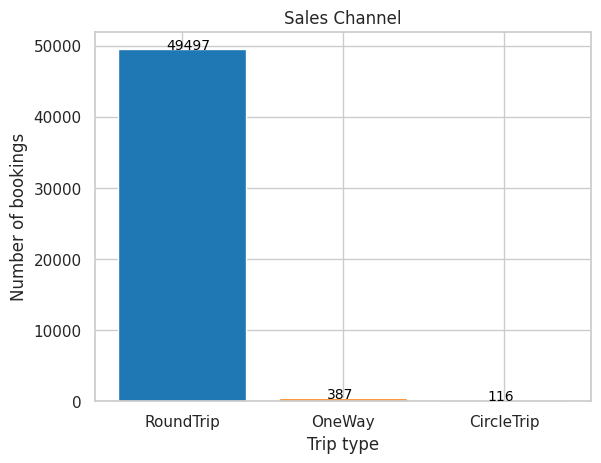

In [ ]:
df_plot = df['trip_type'].value_counts().reset_index()
print(df_plot)
ax = plt.bar(df_plot['trip_type'], df_plot['count'], color = cmap[0:5:2])

for p in ax.patches:
  x = p.get_x() + 0.3
  y = p.get_height() + 0.2
  value =  str(p.get_height())
  plt.annotate(value, (x,y), color = 'black', size = 10)

plt.ylabel('Number of bookings')
plt.xlabel('Trip type')
plt.title('Sales Channel')
plt.show()

## Flight day

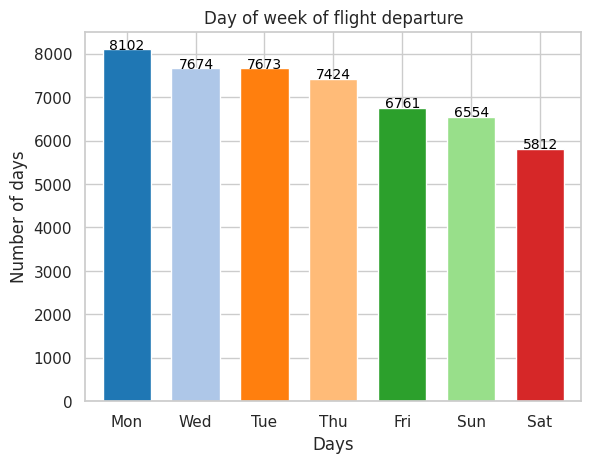

In [ ]:
df_plot = df['flight_day'].value_counts()
ax = df_plot.plot(kind='bar', width = 0.7, color = cmap[:7])

for p in ax.patches:
  x = p.get_x() + 0.1
  y = p.get_height() + 0.3
  value =  str(p.get_height())
  plt.annotate(value, (x,y), color = 'black', size = 10)

plt.xticks(rotation = 0)
plt.ylabel('Number of days')
plt.xlabel('Days')
plt.title('Day of week of flight departure')
plt.show()

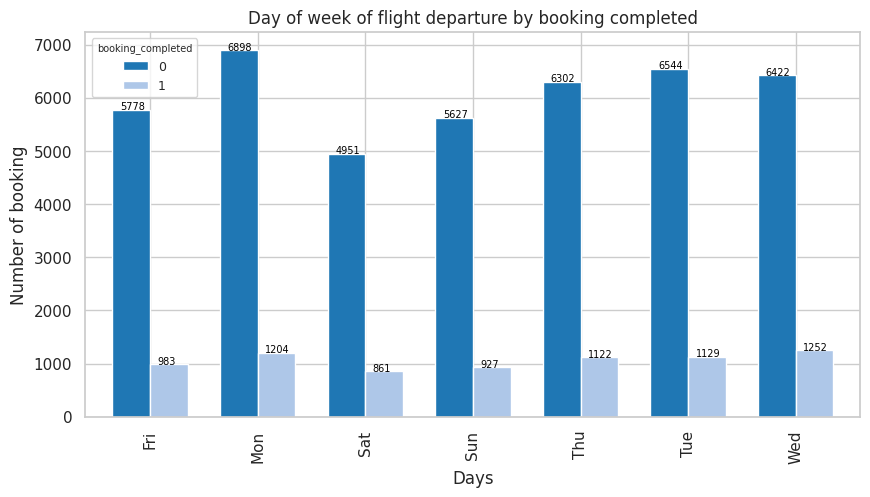

In [ ]:
df_plot = df.groupby('booking_complete')['flight_day'].value_counts().unstack()
ax = df_plot.T.plot(kind='bar', width = 0.7, color = cmap[:7], figsize = (10,5))

for p in ax.patches:
  x = p.get_x() + 0.07
  y = p.get_height() + 0.5
  value =  str(p.get_height())
  plt.annotate(value, (x,y), color = 'black', size = 7)


plt.legend(fontsize = 9, title = 'booking_completed', title_fontsize = 7)
plt.ylabel('Number of booking')
plt.xlabel('Days')
plt.title('Day of week of flight departure by booking completed')
plt.show()

In [ ]:
# label encoding
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df['flight_day'] = df["flight_day"].map(mapping)

## Booking Origin

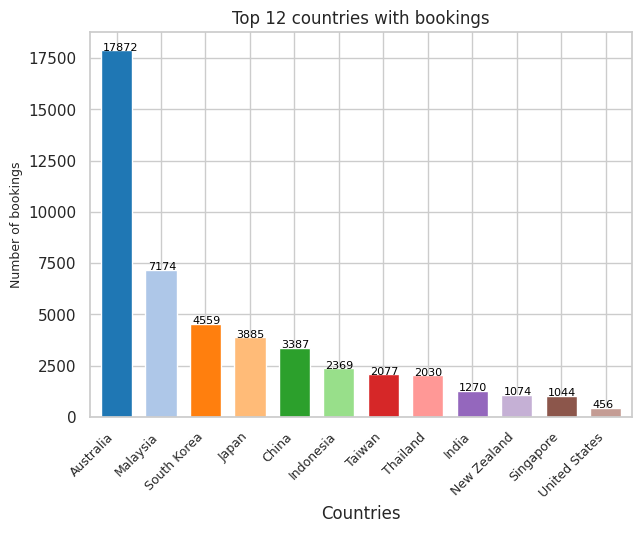

In [ ]:
df_plot = df['booking_origin'].value_counts().sort_values(ascending = False)
ax = df_plot[:12].plot(kind = 'bar', width = 0.7, color = cmap[:12], figsize = (7,5))

for p in ax.patches:
  x = p.get_x() + 0.05
  y = p.get_height() + 0.5
  value =  str(p.get_height())
  plt.annotate(value, (x,y), color = 'black', size = 8)

plt.xticks(rotation = 45, ha='right', fontsize = 9)
plt.xlabel('Countries')
plt.ylabel('Number of bookings', fontsize = 9)
plt.title('Top 12 countries with bookings')
plt.show()

## Booking Completed

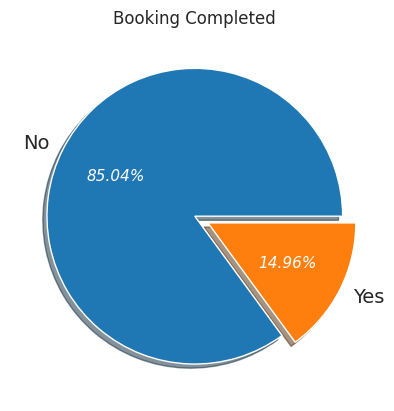

In [ ]:
df_plot = df['booking_complete'].value_counts().reset_index()
df_plot['percent'] = df_plot['count']/ df_plot['count'].sum() * 100

patches, texts, autotexts = plt.pie(df_plot['percent'], labels = ['No', 'Yes'], autopct='%.2f%%',
                                    textprops = {'fontsize': 14}, explode = (0,0.1), shadow = True, colors=cmap[0:3:2])
for auto in autotexts:
  auto.set_fontsize(11)
  auto.set_horizontalalignment('center')
  auto.set_fontstyle('italic')
  auto.set_color('white')

plt.ylabel('')
plt.title('Booking Completed')
plt.show()

# Prepare the Dataset

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
X = df.drop('booking_complete', axis = 1)
y = df['booking_complete']

df_numerics = X.select_dtypes(include = ['int','float'])
df_object = df.select_dtypes(include = 'object')

## Check outliers

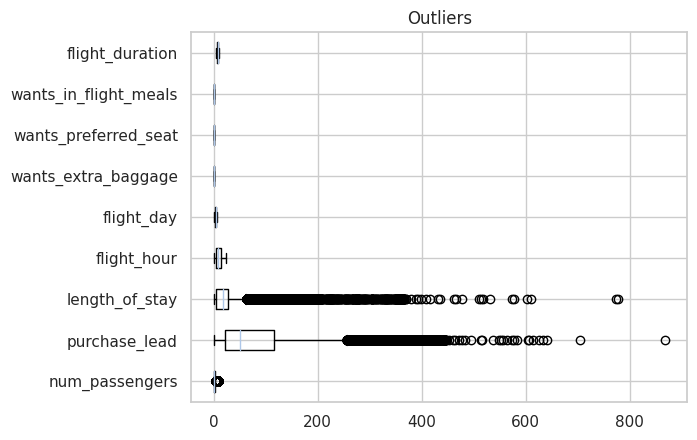

In [ ]:
plt.boxplot(df_numerics, vert = False, labels = df_numerics.columns)
plt.title('Outliers')
plt.show()

We observe that the variables num_passengers, purchase_lead and length_of_stay contain outliers. Therefore, we will replace these outliers with the mean value.

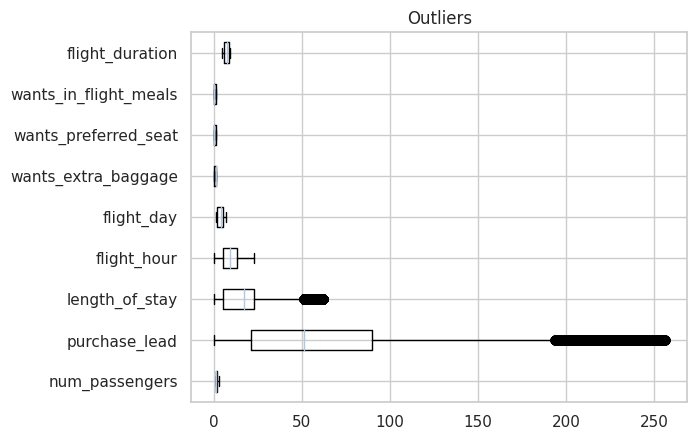

In [ ]:
def clean_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  median_value = df[column].median()
  df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

clean_outliers(df_numerics, 'num_passengers')
clean_outliers(df_numerics, 'purchase_lead')
clean_outliers(df_numerics, 'length_of_stay')

plt.boxplot(df_numerics, vert = False, labels = df_numerics.columns)
plt.title('Outliers')
plt.show()

The outliers still exist in length_of_day and purchase_lead, therefore we will delete its.

In [ ]:
columns = ['length_of_stay', 'purchase_lead']
outlier_indices = set()
for col in columns:
  q1 = df_numerics[col].quantile(0.25)
  q3 = df_numerics[col].quantile(0.75)
  iqr = q3 - q1

  upper_bound = q3 + 1.5 * iqr
  ind = df_numerics[df_numerics[col] > upper_bound].index
  outlier_indices.update(ind)

  # df_numerics = df_numerics.drop(ind)
outlier_indices = sorted(list(outlier_indices))
df_numerics = df_numerics.drop(index = outlier_indices)
df_object = df_object.drop(index = outlier_indices)
y = y.drop(index = outlier_indices)
print(df_numerics.shape)
print(y.shape)

(45653, 9)
(45653,)


## Scaling

In [ ]:
scaling = StandardScaler()
df_scaled = scaling.fit_transform(df_numerics)
df_numerics = pd.DataFrame(df_scaled, columns = df_numerics.columns)
df_numerics.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1.076113,-0.103617,0.369610,-0.382123,1.104229,0.709106,-0.649915,-0.860323,-1.172974
1,-0.623164,1.223152,0.455065,-1.121939,1.104229,-1.410227,-0.649915,-0.860323,-1.172974
2,-0.623164,0.875147,1.395067,-0.936985,1.104229,-1.410227,-0.649915,1.162354,-1.172974
3,1.076113,0.266139,0.625974,1.097509,-0.407794,0.709106,-0.649915,1.162354,-1.172974
4,-0.623164,-1.147631,2.847797,2.022279,0.096213,0.709106,-0.649915,1.162354,-1.172974


# Encoding

In [ ]:
encode = OneHotEncoder(sparse_output = False)
df_encode = encode.fit_transform(df_object)
df_encode = pd.DataFrame(df_encode, columns = encode.get_feature_names_out())
df_encode.head()

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,route_AKLDEL,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Correlation matrix of Numerics Feature

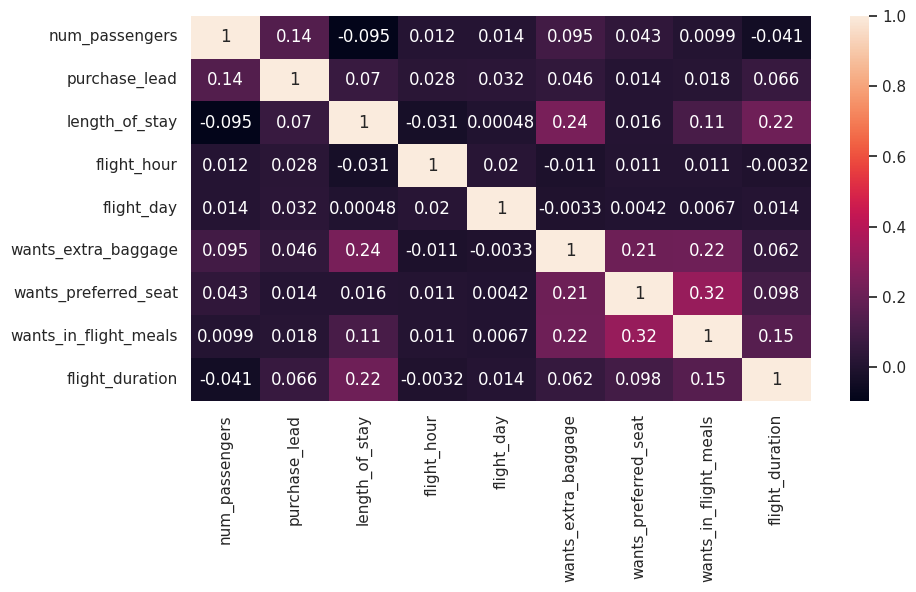

In [ ]:
corr = df_numerics.corr()
plt.figure(figsize=(10,5))
#plot the heatmap
sns.heatmap(corr, annot =True)
plt.show()

# Training model

In [ ]:
X = pd.concat([df_numerics, df_encode], axis = 1)
X

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,1.076113,-0.103617,0.369610,-0.382123,1.104229,0.709106,-0.649915,-0.860323,-1.172974,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.623164,1.223152,0.455065,-1.121939,1.104229,-1.410227,-0.649915,-0.860323,-1.172974,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.623164,0.875147,1.395067,-0.936985,1.104229,-1.410227,-0.649915,1.162354,-1.172974,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.076113,0.266139,0.625974,1.097509,-0.407794,0.709106,-0.649915,1.162354,-1.172974,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.623164,-1.147631,2.847797,2.022279,0.096213,0.709106,-0.649915,1.162354,-1.172974,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45648,1.076113,-0.625624,-0.741302,-0.012215,1.104229,0.709106,-0.649915,1.162354,-1.105966,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45649,-0.623164,1.201401,-0.741302,-0.936985,1.608237,-1.410227,-0.649915,-0.860323,-1.105966,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45650,-0.623164,-0.690875,-0.741302,2.392187,1.104229,-1.410227,-0.649915,1.162354,-1.105966,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45651,-0.623164,-0.886627,-0.741302,0.357693,-1.415810,0.709106,-0.649915,1.162354,-1.105966,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36522, 915)
(9131, 915)
(36522,)
(9131,)


In [ ]:
forest_model = RandomForestClassifier(random_state=5)
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
predict =  forest_model.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      7820
           1       0.51      0.15      0.23      1311

    accuracy                           0.86      9131
   macro avg       0.69      0.56      0.58      9131
weighted avg       0.82      0.86      0.82      9131



The accuracy is : 0.8571897930128135
The precision is : 0.5089058524173028
The recall is : 0.15255530129672007
The f1 score is : 0.2347417840375587


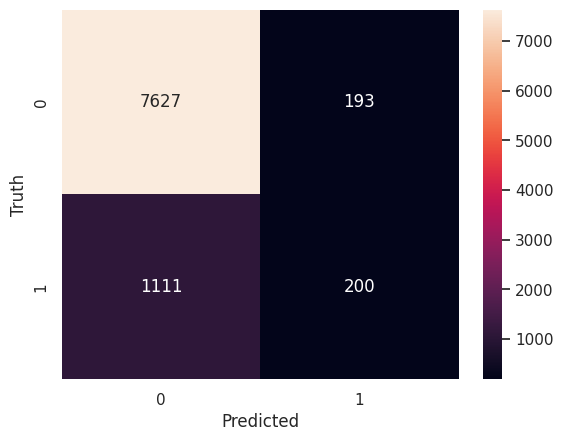

In [ ]:
print('The accuracy is :', accuracy_score(y_test, predict))
print('The precision is :', precision_score(y_test, predict))
print('The recall is :', recall_score(y_test, predict))
print('The f1 score is :', f1_score(y_test, predict))
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
feature_important = pd.DataFrame({
    'features': X_train.columns,
    'importance': forest_model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index(drop=True)

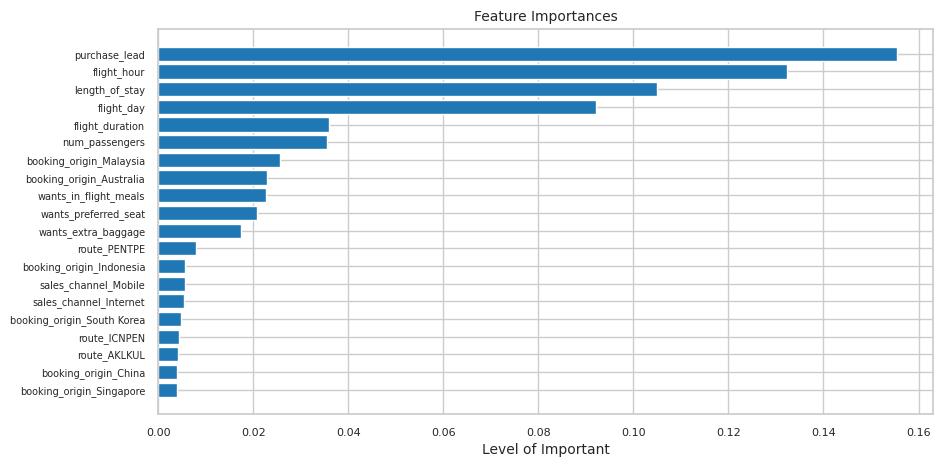

In [ ]:
df_plot =  feature_important.tail(20)
plt.figure(figsize = (10,5))
plt.title('Feature Importances', fontsize = 10)
plt.barh(df_plot['features'], df_plot['importance'], align = 'center')
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 8)
plt.xlabel('Level of Important', fontsize = 10)
plt.show()